In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering



In [ ]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.csv to EastWestAirlines (1).csv


In [ ]:
airline=pd.read_csv('EastWestAirlines.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [ ]:
#normalization
def minmax_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)


In [ ]:
#dataframe of normalized data
df_norm=minmax_func(airline.iloc[:,1:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


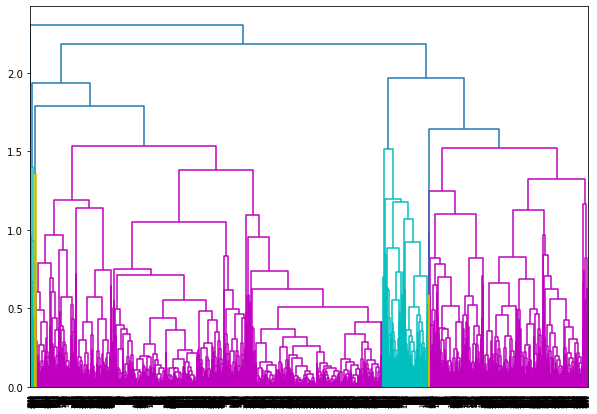

In [ ]:
#dendrogram
plt.figure(figsize=(10, 7))  
sch.set_link_color_palette(['m','c','y'])
dendogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [ ]:
#creating clusters
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
hclusters

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [ ]:
#save clusters for chart
y_hc=hclusters.fit_predict(df_norm)
y_hc

array([0, 0, 0, ..., 2, 0, 0])

In [ ]:
airline['h_clusters']=y_hc
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
airline.groupby('h_clusters').mean()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusters,,,,,,,,,,,,
0,2169.576353,59968.433667,88.883768,1.712224,1.000401,1.011222,10271.530261,9.105812,227.797194,0.656112,3825.392786,0.000802
1,1106.516923,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,1923.643357,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,2302.967742,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548


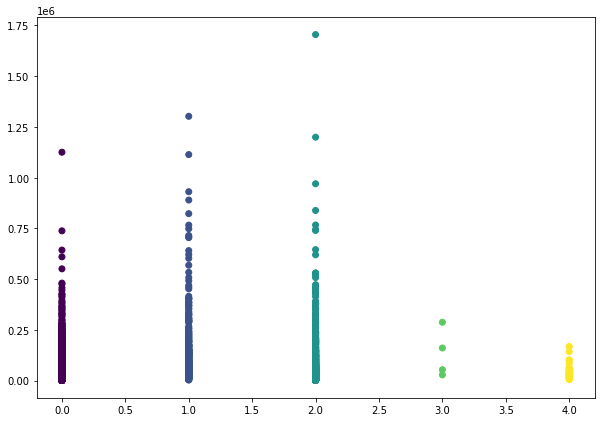

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline['h_clusters'],airline['Balance'], c=hclusters.labels_) 


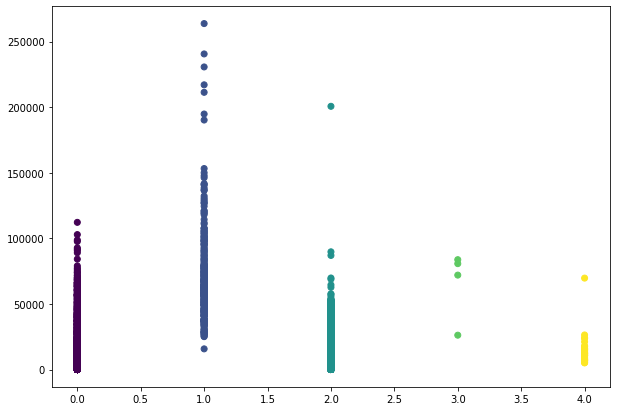

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline['h_clusters'],airline['Bonus_miles'], c=hclusters.labels_) 


In [ ]:
#kmeans
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving EastWestAirlines.csv to EastWestAirlines (2).csv


In [ ]:
a1=pd.read_csv('EastWestAirlines.csv')
a1


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
#normalizing
def norm_func(i):
 X=(i-i.mean())/(i.std())
 return(X)

In [ ]:
X=norm_func(airline.iloc[:,1:])
X

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusters
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823,-0.730201
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823,-0.730201
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823,-0.730201
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823,-0.730201
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755,0.332030
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547010,-0.186275,-0.769482,-0.09823,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955,1.303755,1.394261
3995,-0.091454,-0.186275,-0.769482,-0.09823,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829,1.303755,1.394261
3996,-0.000043,-0.186275,0.683036,-0.09823,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439,1.303755,1.394261
3997,-0.185584,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924,-0.766823,-0.730201


In [ ]:
#elbow chart
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
print(wcss)

[47975.99999999997, 38201.569499559926, 33550.48332134833, 29390.65924298323, 25717.87836363806, 22177.110359732098, 19636.405682186367, 17762.901035203075, 16429.24168611333, 15107.09285588183]


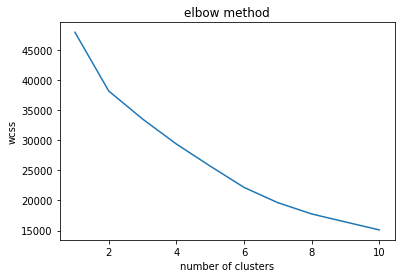

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()


In [ ]:
clusters_new=KMeans(8,random_state=0)
clusters_new.fit(X)

KMeans(random_state=0)

In [ ]:
clusters_new.labels_

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [ ]:
airline['clusters_new']=clusters_new.labels_
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusters,clusters_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,1


In [ ]:
airline.groupby('clusters_new').agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusters
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters_new,,,,,,,,,,,,,
0,1707.245614,206426.035088,547.956140,2.271930,1.000000,1.000000,35285.877193,29.482456,6360.298246,18.157895,4752.877193,0.807018,1.394737
1,2337.822534,36233.517221,33.992995,1.058377,1.000000,1.000584,2598.887916,5.300642,169.393462,0.500876,3508.180969,0.000000,0.000000
2,1430.099609,134672.154297,93.515625,4.306641,1.000000,1.001953,56877.910156,21.029297,509.562500,1.634766,5176.037109,0.972656,1.384766
3,1946.699642,59603.814064,100.247914,1.755662,1.000000,1.000000,11171.423123,10.783075,413.071514,1.270560,4261.321812,1.000000,2.000000
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,0.400000
5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,3.395349
6,1773.238028,110517.285915,25.126761,3.209859,1.000000,1.001408,26168.576056,17.333803,187.443662,0.547887,4571.798592,0.000000,0.000000
7,2092.452830,118330.113208,5728.433962,2.000000,1.000000,1.000000,18361.716981,12.433962,968.245283,2.905660,3916.000000,0.509434,0.962264


In [ ]:
#dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving EastWestAirlines.csv to EastWestAirlines (1).csv


In [ ]:
a2=pd.read_csv('EastWestAirlines.csv')
a2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
a2.drop(['ID#'],axis=1,inplace=True)
a2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
data=a2.values
data

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]])

In [ ]:
stscaler=StandardScaler()
X=stscaler.fit_transform(data)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
dbscan=DBSCAN(eps=4,min_samples=14)
dbscan.fit(X)

DBSCAN(eps=4, min_samples=14)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
a2['cluster']=pd.DataFrame(dbscan.labels_)
a2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:
a2['cluster'].value_counts()

 0    3910
-1      63
 1      26
Name: cluster, dtype: int64

In [ ]:
#% of noise points
len(a2[a2['cluster']==-1])/len(a2)*100

1.5753938484621155

In [ ]:
#silhouette score
from sklearn import metrics
X=metrics.silhouette_score(X,dbscan.labels_)
X


0.5085347201186227

In [ ]:
def dbscan(X,eps,min_samples):
  ss=StandardScaler()
  X=ss.fit_transform(X)
  db=DBSCAN(eps=eps,min_samples=min_samples)
  db.fit(X)
  y_pred=db.fit_predict(X)
  plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='Paired')
  plt.title('DBSCAN')

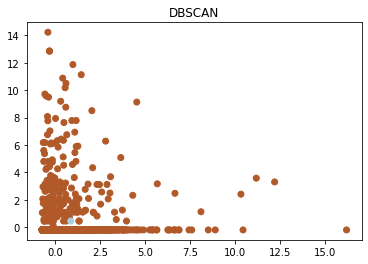

In [ ]:
dbscan(data,12.5,25)

In [ ]:
stscaler=StandardScaler()
X=stscaler.fit_transform(data)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [ ]:
dbscan=DBSCAN(eps=12.5,min_samples=25)
dbscan.fit(X)

DBSCAN(eps=12.5, min_samples=25)

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X=metrics.silhouette_score(X,dbscan.labels_)
X


0.8562820070415407

In [ ]:
a2.groupby(['cluster']).agg(['mean'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,
-1,1732.650794,255665.174603,948.666667,2.634921,1.507937,1.777778,63716.809524,28.206349,3851.793651,9.920635,4799.095238,0.698413
0,2017.269309,70809.257545,132.109463,2.056266,1.000000,1.000000,16431.693095,11.310230,406.978772,1.239642,4109.630691,0.365217
1,2330.115385,52331.000000,0.000000,1.153846,2.000000,1.000000,11544.653846,15.230769,223.576923,0.807692,3812.307692,0.346154
